In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [53]:
df = pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks.csv')

In [54]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Male,2,15,"Sep 16 - Sep 28, 2020",09/16/2020,09/28/2020,6.9,6.5,7.3,6.5 - 7.3,NaN,NaN
1,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,2,15,"Sep 16 - Sep 28, 2020",09/16/2020,09/28/2020,11.0,10.4,11.6,10.4 - 11.6,NaN,NaN
2,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Female,-1,1,"Dec 22, 2020 - Jan 5, 2021",12/22/2020,01/05/2021,NaN,NaN,NaN,NaN,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,-1,1,"Mar 30 - Apr 13, 2021",03/30/2021,04/13/2021,NaN,NaN,NaN,NaN,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,60 - 69 years,-1,1,"Mar 30 - Apr 13, 2021",03/30/2021,04/13/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

In [56]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Indicator,10404,4,"Received Counseling or Therapy, Last 4 Weeks",2601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Group,10404,10,By State,6732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,10404,52,United States,3672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subgroup,10404,80,Male,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phase,10404,8,3.2,1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time Period,10404.0,NaN,NaN,NaN,28.134948,11.04021,1.0,20.0,29.0,37.0,45.0
Time Period Label,10404,38,"Apr 27 - May 9, 2022",320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time Period Start Date,10404,38,04/27/2022,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time Period End Date,10404,38,05/09/2022,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,9914.0,NaN,NaN,NaN,17.450736,8.270565,1.4,10.3,16.2,24.0,62.9


In [57]:
df.shape

(10404, 15)

In [58]:
df.isna().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

In [59]:
df.duplicated().sum()

np.int64(0)

## Data cleaning

In [60]:
df['Indicator'].unique()

array(['Received Counseling or Therapy, Last 4 Weeks',
       'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks',
       'Took Prescription Medication for Mental Health, Last 4 Weeks',
       'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks'],
      dtype=object)

In [61]:
indicator_map = {
    'Received Counseling or Therapy, Last 4 Weeks': 'Therapy Received',
    'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks': 'Unmet Need',
    'Took Prescription Medication for Mental Health, Last 4 Weeks': 'Medication Use',
    'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks': 'Combined Treatment'
}

df['Indicator'] = df['Indicator'].map(indicator_map).astype('category')

In [62]:
df['Group'].unique()

array(['By Sex', 'By Age', 'National Estimate',
       'By Presence of Symptoms of Anxiety/Depression',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Sexual orientation', 'By Disability status',
       'By Gender identity'], dtype=object)

In [63]:
df['Group'] = df['Group'].astype('category')

In [64]:
group_mapping = {
    'By Age': 'Age Group',
    'By Disability status': 'Disability Status',
    'By Education': 'Education Level',
    'By Gender identity': 'Gender Identity',
    'By Presence of Symptoms of Anxiety/Depression': 'Mental Health Symptoms',
    'By Race/Hispanic ethnicity': 'Race/Ethnicity',
    'By Sex': 'Sex',
    'By Sexual orientation': 'Sexual Orientation',
    'By State': 'State',
    'National Estimate': 'National Average'
}

df['Group'] = df['Group'].astype(str).replace(group_mapping)

In [65]:
df['State'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [66]:
df['State'] = df['State'].astype('category')

In [67]:
df.query('State == "United States"').head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Therapy Received,Sex,United States,Male,2,15,"Sep 16 - Sep 28, 2020",09/16/2020,09/28/2020,6.9,6.5,7.3,6.5 - 7.3,NaN,NaN
1,Therapy Received,Sex,United States,Female,2,15,"Sep 16 - Sep 28, 2020",09/16/2020,09/28/2020,11.0,10.4,11.6,10.4 - 11.6,NaN,NaN
2,Unmet Need,Sex,United States,Female,-1,1,"Dec 22, 2020 - Jan 5, 2021",12/22/2020,01/05/2021,NaN,NaN,NaN,NaN,NaN,NaN
3,Medication Use,Age Group,United States,50 - 59 years,-1,1,"Mar 30 - Apr 13, 2021",03/30/2021,04/13/2021,NaN,NaN,NaN,NaN,NaN,NaN
4,Medication Use,Age Group,United States,60 - 69 years,-1,1,"Mar 30 - Apr 13, 2021",03/30/2021,04/13/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df['Subgroup'].unique()

array(['Male', 'Female', '50 - 59 years', '60 - 69 years',
       '70 - 79 years', '80 years and above', '40 - 49 years',
       'United States', '18 - 29 years', '30 - 39 years',
       'Did not experience symptoms of anxiety/depression in the past 4 weeks',
       'Experienced symptoms of anxiety/depression in past 4 weeks',
       'Hispanic or Latino', 'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota

In [69]:
mapping_dict = {
    'United States': 'National Average',
    
    'Less than a high school diploma': 'Below High School',
    'High school diploma or GED': 'High School/GED',
    "Some college/Associate's degree": 'Some College',
    "Bachelor's degree or higher": 'Bachelor+',
    
    'Experienced symptoms of anxiety/depression in past 4 weeks': 'Symptomatic',
    'Did not experience symptoms of anxiety/depression in the past 4 weeks': 'Asymptomatic',
    
    'Hispanic or Latino': 'Hispanic',
    'Non-Hispanic White, single race': 'White',
    'Non-Hispanic Black, single race': 'Black',
    'Non-Hispanic Asian, single race': 'Asian',
    'Non-Hispanic, other races and multiple races': 'Other/Multiracial',
    
    'Gay or lesbian': 'Gay/Lesbian',
    'Straight': 'Heterosexual',
    'Bisexual': 'Bisexual',
    'Cis-gender male': 'Cis Male',
    'Cis-gender female': 'Cis Female',
    'Transgender': 'Transgender',
    
    'With disability': 'Disabled',
    'Without disability': 'Non-disabled',
    
    '80 years and above': '80+',
    '18 - 29 years': '18-29',
    '30 - 39 years': '30-39',
    '40 - 49 years': '40-49',
    '50 - 59 years': '50-59',
    '60 - 69 years': '60-69',
    '70 - 79 years': '70-79'
}

# Zastosowanie w Pandas:
df['Subgroup'] = df['Subgroup'].replace(mapping_dict).astype('category')

In [70]:
df['Phase'].unique()

array(['2', '-1', '3 (Oct 28 – Dec 21)', '3 (Jan 6 – Mar 29)', '3.1',
       '3.2', '3.3', '3.4'], dtype=object)

In [71]:
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'], format="%m/%d/%Y")
df['Time Period End Date'] = pd.to_datetime(df['Time Period End Date'])

In [72]:
df['Value'].min()

1.4

In [73]:
df = df.dropna(subset=['Value'])
df = df.drop(columns=['Suppression Flag', 'Quartile Range', 'Confidence Interval'])

In [74]:
df.isna().sum()

Indicator                 0
Group                     0
State                     0
Subgroup                  0
Phase                     0
Time Period               0
Time Period Label         0
Time Period Start Date    0
Time Period End Date      0
Value                     0
LowCI                     0
HighCI                    0
dtype: int64

In [75]:
df.to_csv('Mental health cleaned.csv', index=False, sep=';')
df.to_excel('Mental health cleaned.xlsx')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9914 entries, 0 to 10403
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               9914 non-null   category      
 1   Group                   9914 non-null   object        
 2   State                   9914 non-null   category      
 3   Subgroup                9914 non-null   category      
 4   Phase                   9914 non-null   object        
 5   Time Period             9914 non-null   int64         
 6   Time Period Label       9914 non-null   object        
 7   Time Period Start Date  9914 non-null   datetime64[ns]
 8   Time Period End Date    9914 non-null   datetime64[ns]
 9   Value                   9914 non-null   float64       
 10  LowCI                   9914 non-null   float64       
 11  HighCI                  9914 non-null   float64       
dtypes: category(3), datetime64[ns](2), float64(3), int64

<Axes: xlabel='Value', ylabel='Count'>

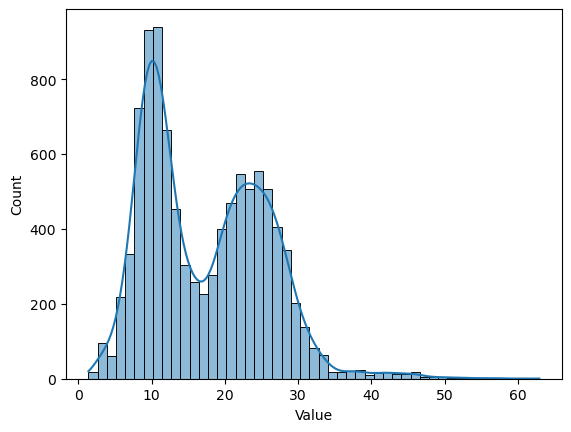

In [77]:
sns.histplot(df['Value'], kde=True)

In [78]:
import statsmodels.formula.api as smf

df_sex = df[df['Group'] == 'Sex'].copy()
df_sex['Subgroup'] = df_sex['Subgroup'].cat.remove_unused_categories()

model = smf.ols('Value ~ C(Subgroup)', data=df_sex).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,20.7250,0.581,35.675,0.000,19.581,21.869
C(Subgroup)[T.Male],-8.1538,0.822,-9.925,0.000,-9.771,-6.536


In [79]:
df_sex_normalized = df_sex.copy()[['Subgroup', 'Value', 'State']]
df_sex_normalized['Value'] = (df_sex_normalized['Value'] - df_sex_normalized['Value'].mean()) / (df_sex_normalized['Value'].sem())

<Axes: xlabel='Subgroup', ylabel='Value'>

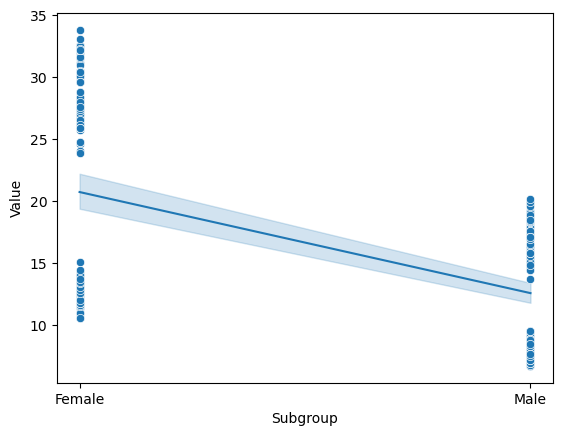

In [81]:
sns.lineplot(df_sex, x='Subgroup', y='Value')
sns.scatterplot(df_sex, x='Subgroup', y='Value')